#### Mean/Median/Mode Imputation
When should we apply ?
Mean/Median imputation has the assumption that the data are missing completely at random (MCAR).
We solve this by replacing the NAN with the most frequent occurance of the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.core.frame import DataFrame

In [2]:
df = pd.read_csv('../data/titanic.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
def impute_nan(df: DataFrame, variable: str, median: np.float64):
    df[variable + '_median'] = df[variable].fillna(median)

In [5]:
median = df.Age.median()
median

28.0

In [6]:
impute_nan(df, 'Age', median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [7]:
df[df.Age.isnull()].head()

,Survived,Age,Fare,Age_median
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0


In [8]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


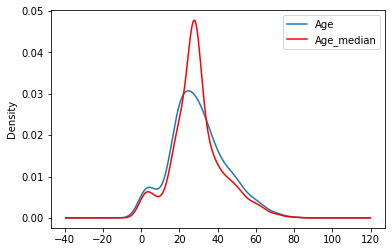

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

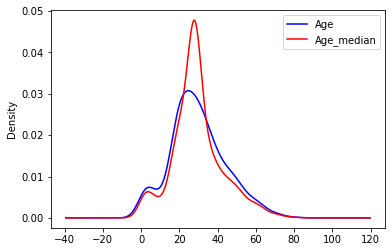

In [10]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_median.plot(kind='kde', color='red', label='Age_median')
plt.legend()
plt.show()

### Pros / Cons of Mean/Median Imputation

#### Pros
1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset

#### Cons
1. Change or Distortion in the original variance
2. Impacts Correlation
